0


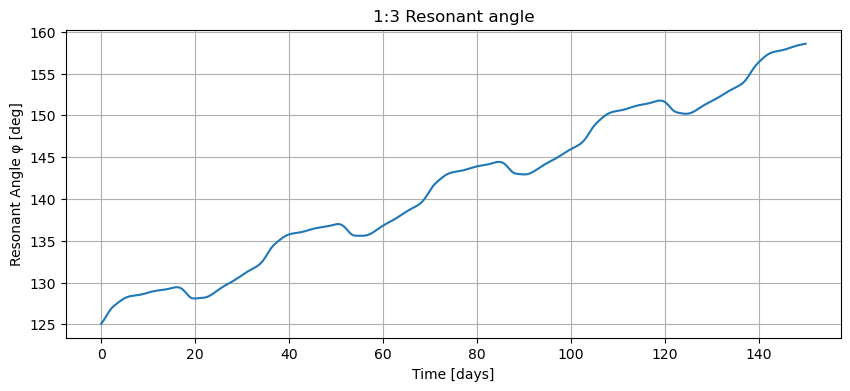

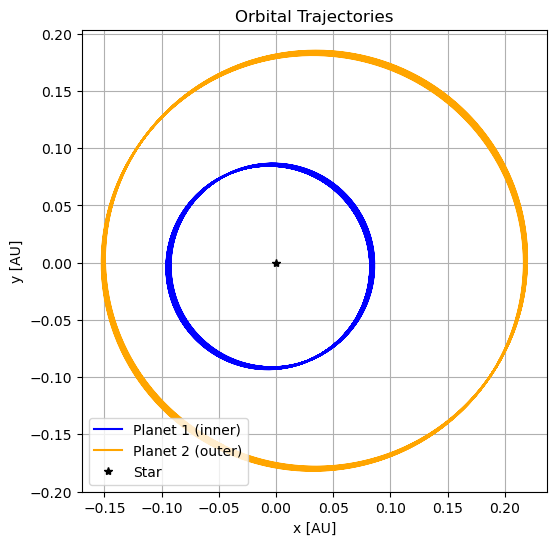

1


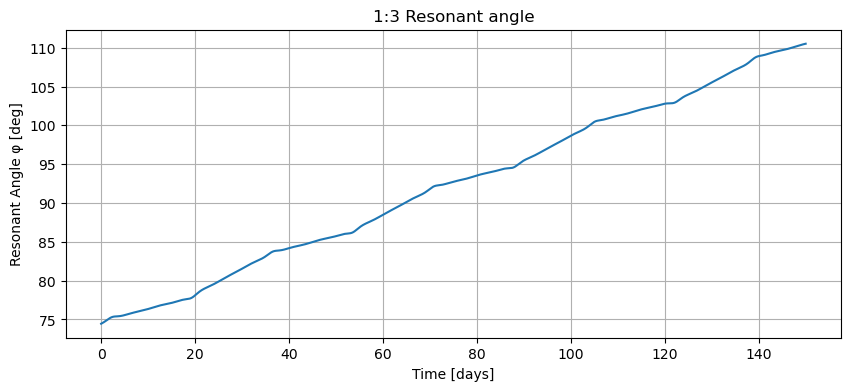

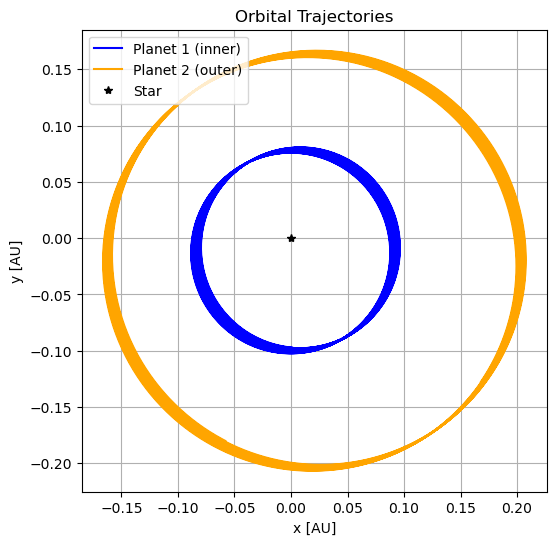

2


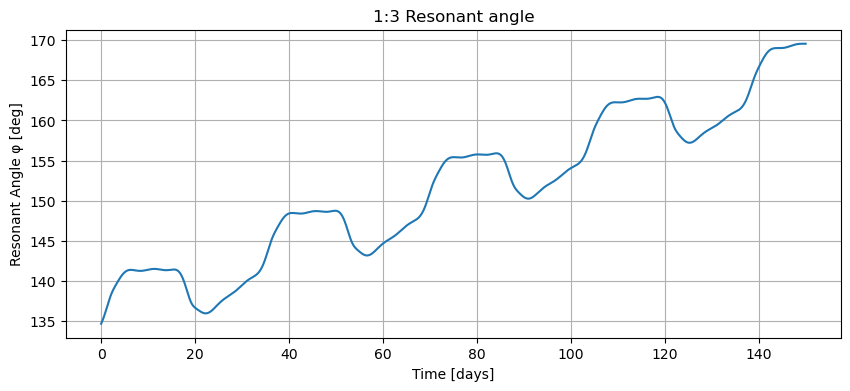

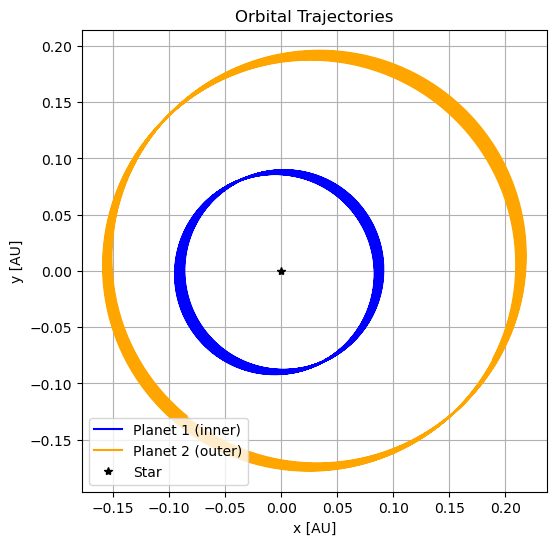

3


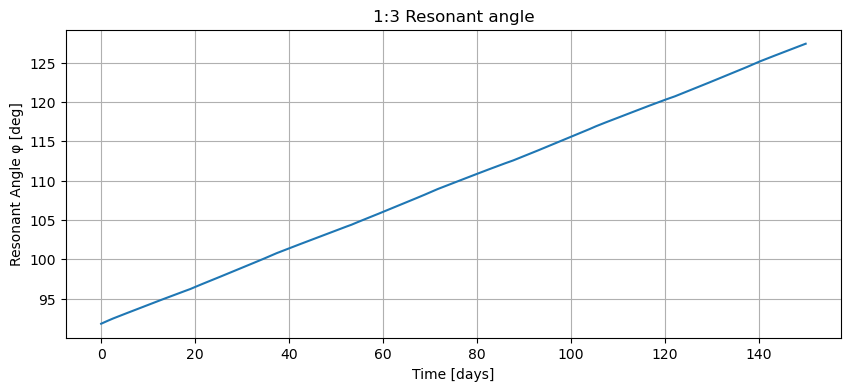

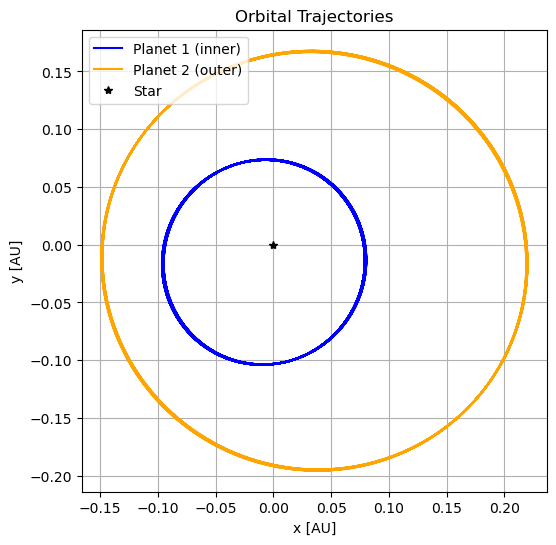

4


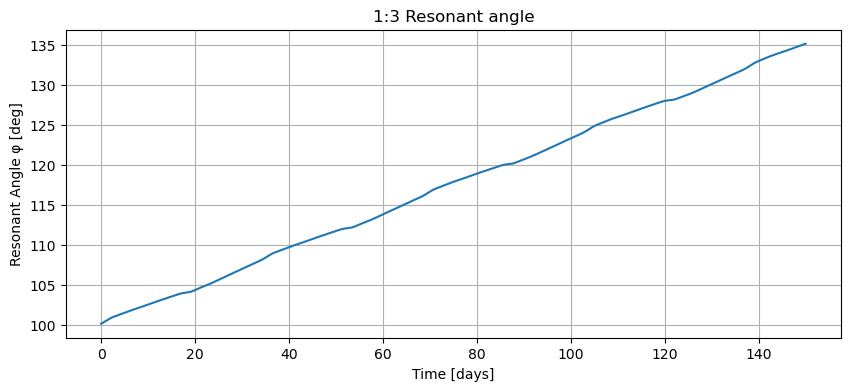

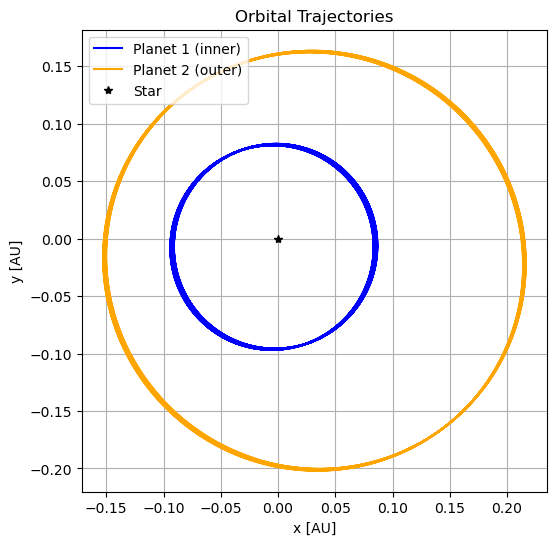

5


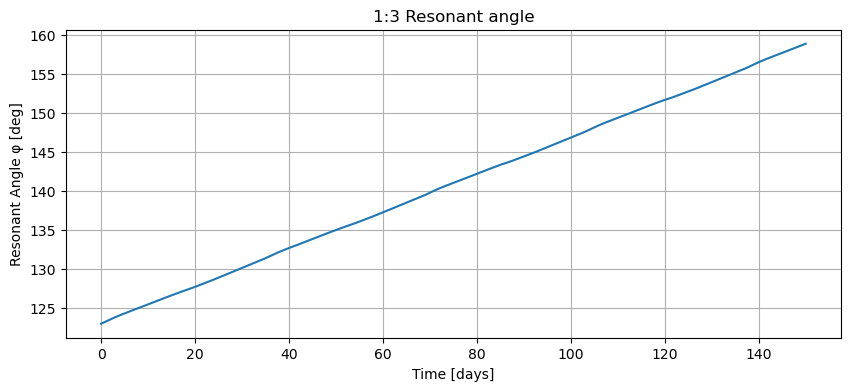

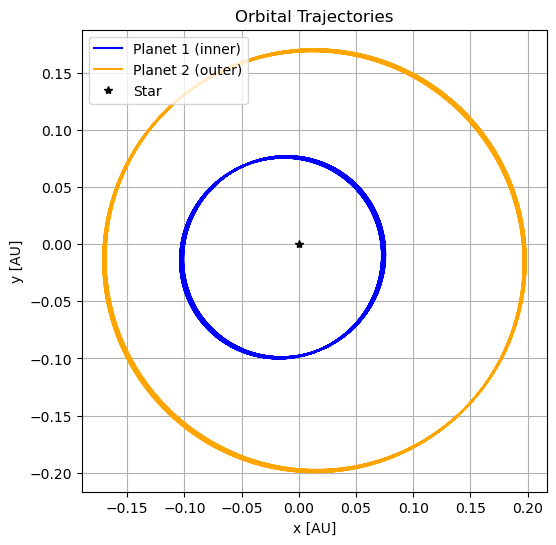

6


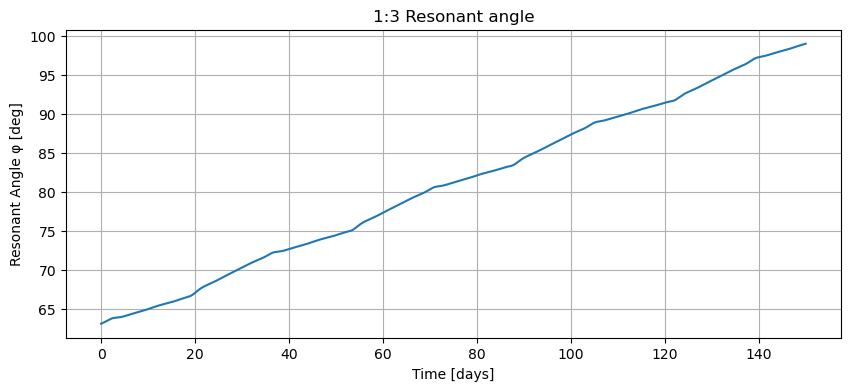

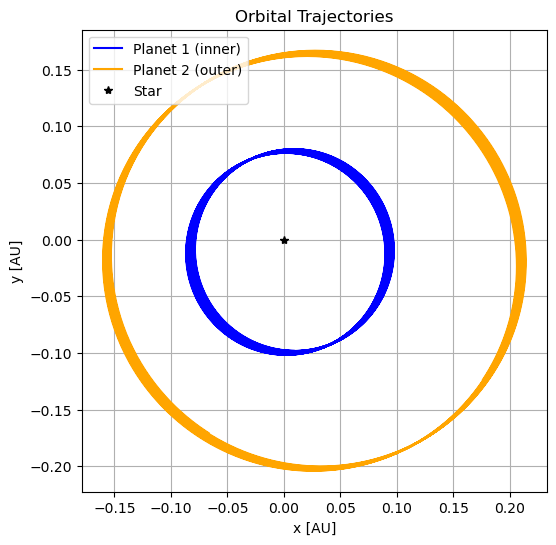

7


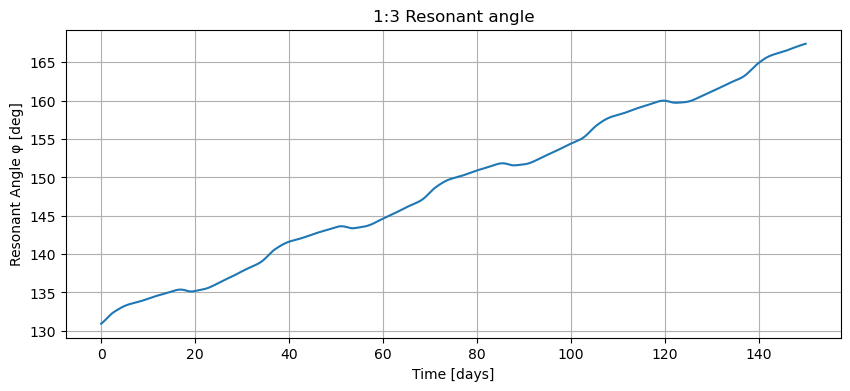

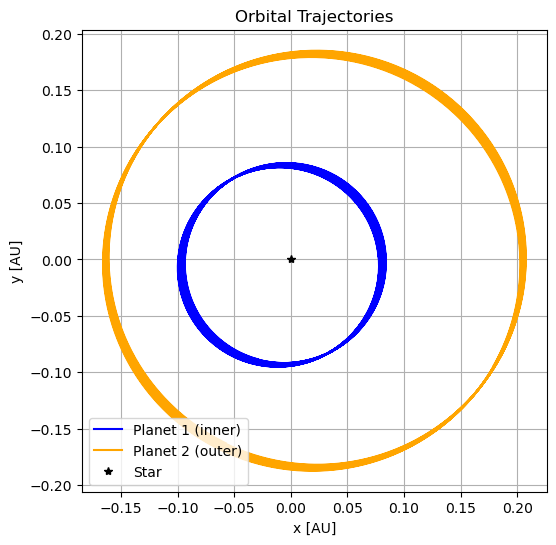

8


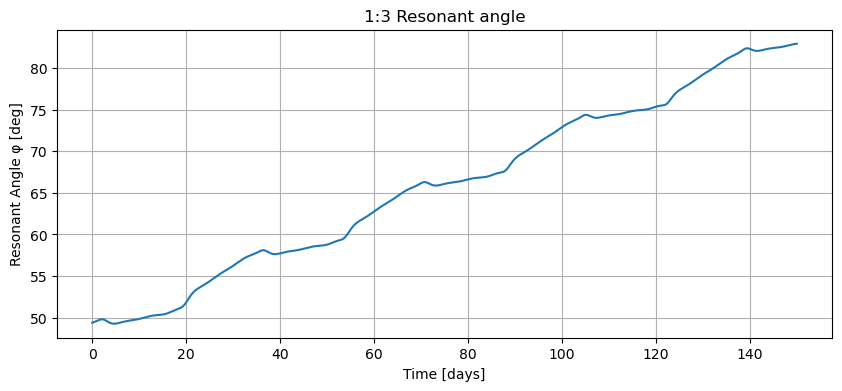

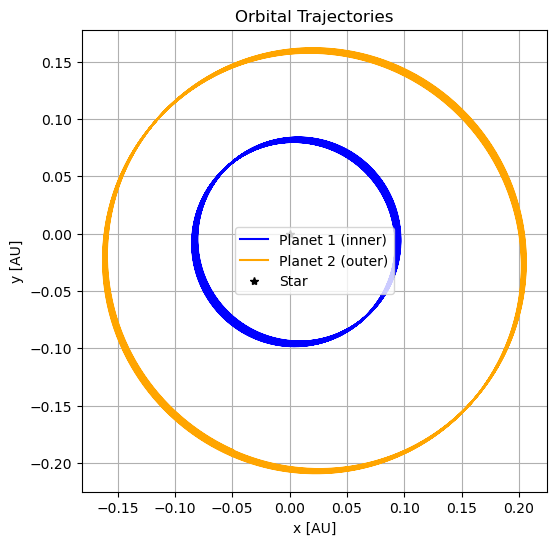

9


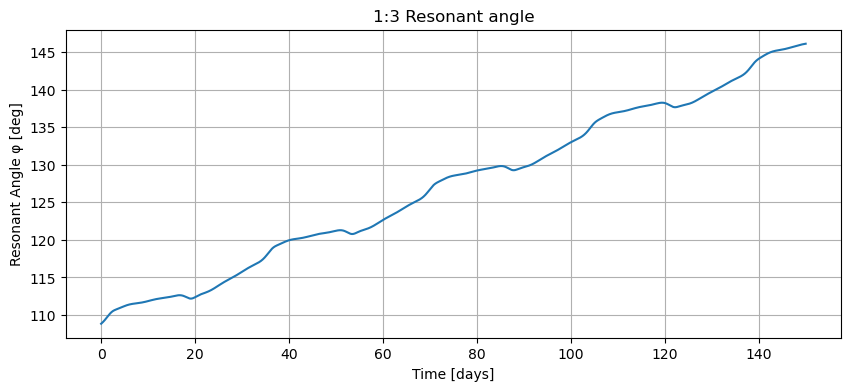

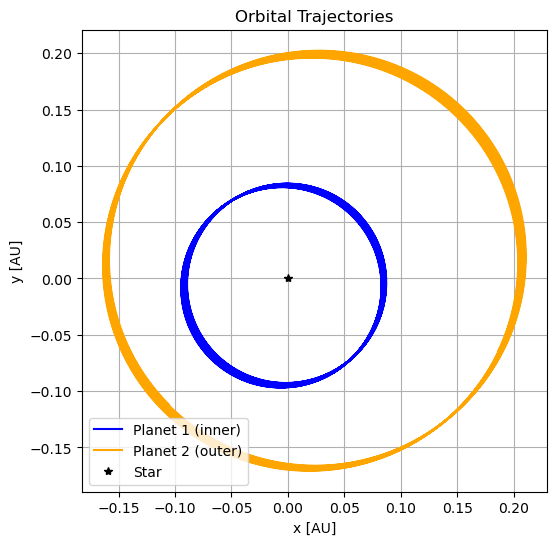

10


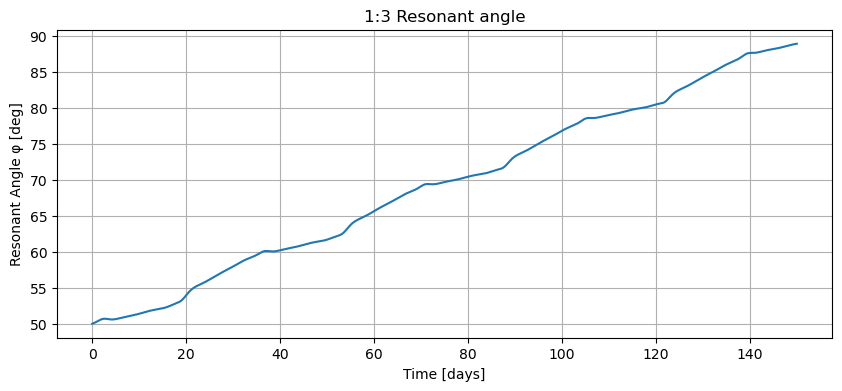

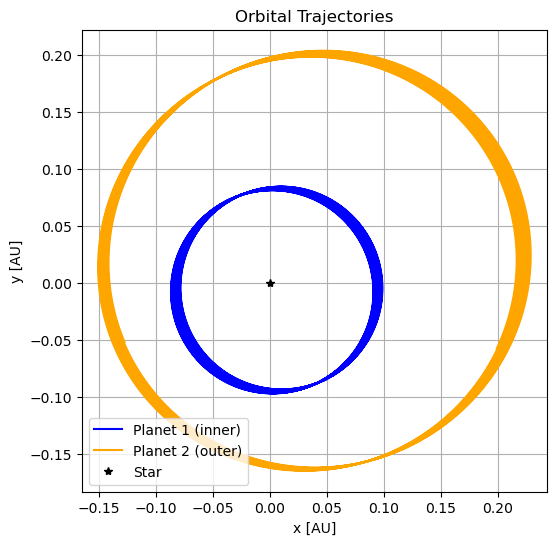

11


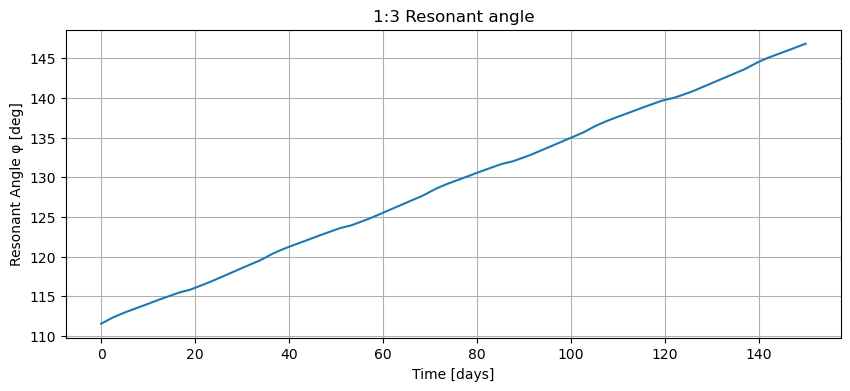

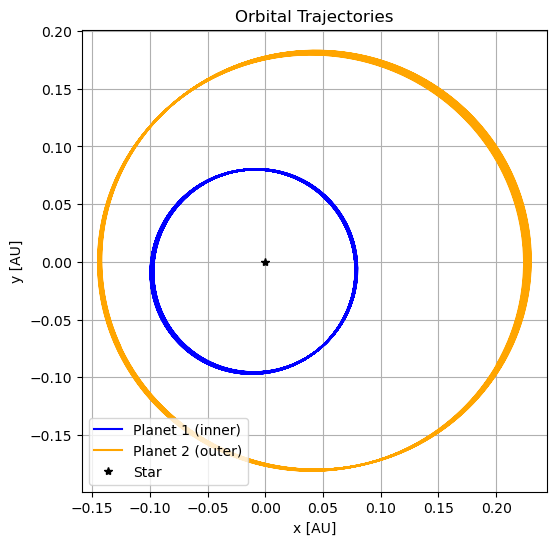

12


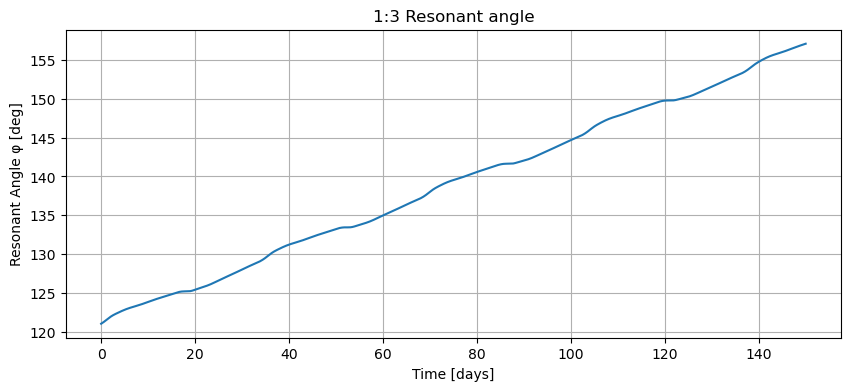

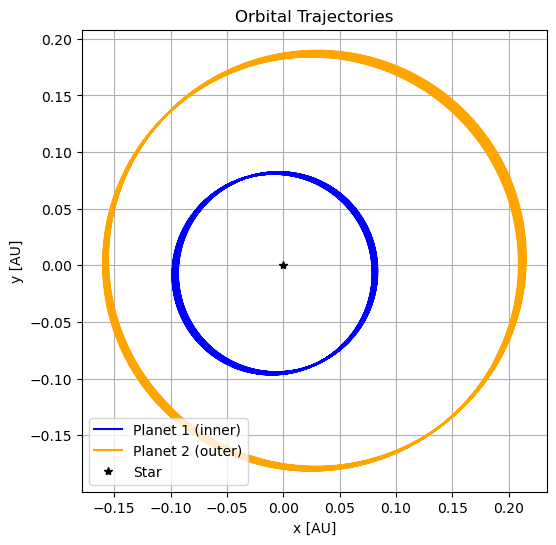

13


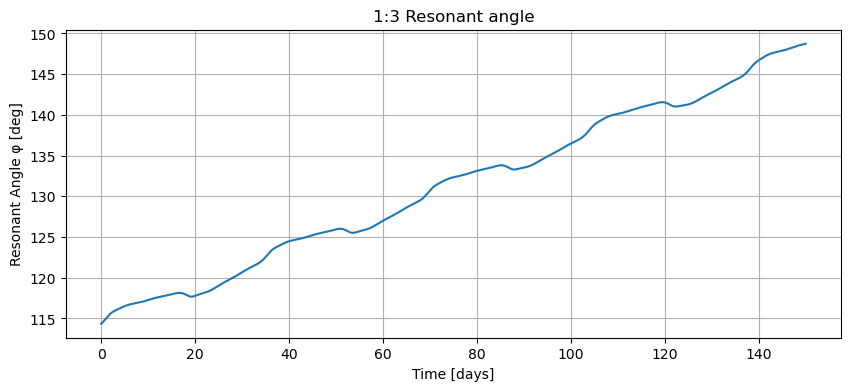

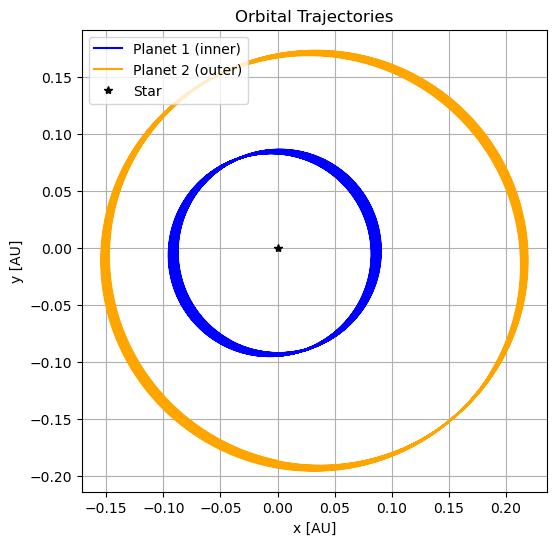

14


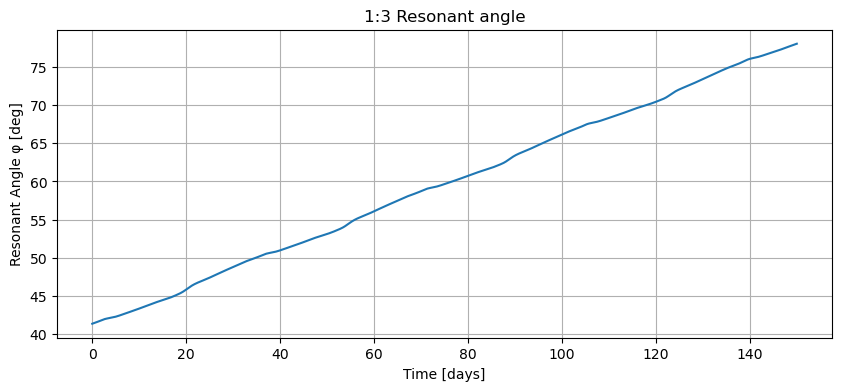

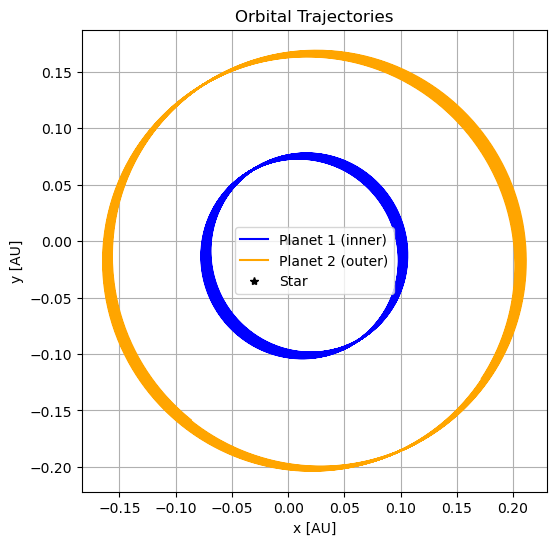

15


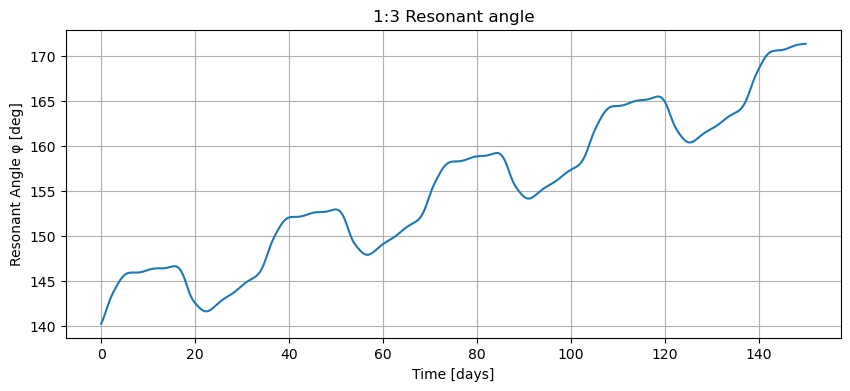

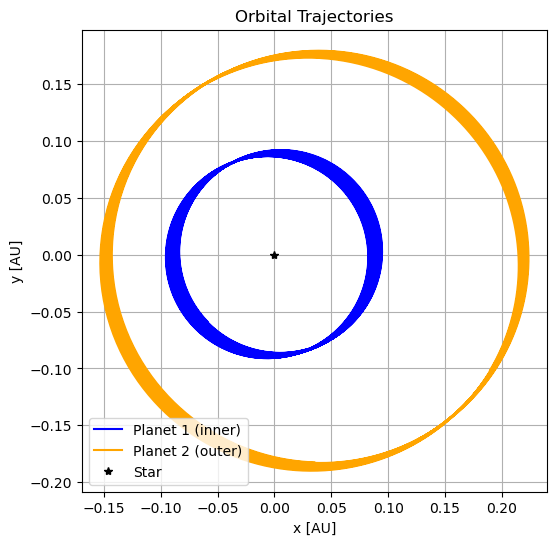

16


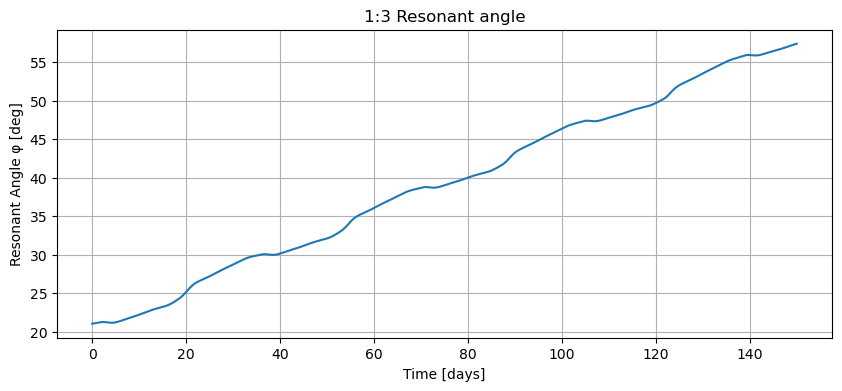

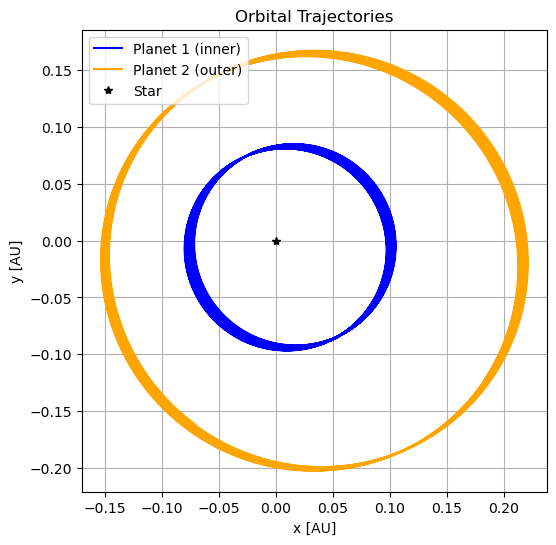

17


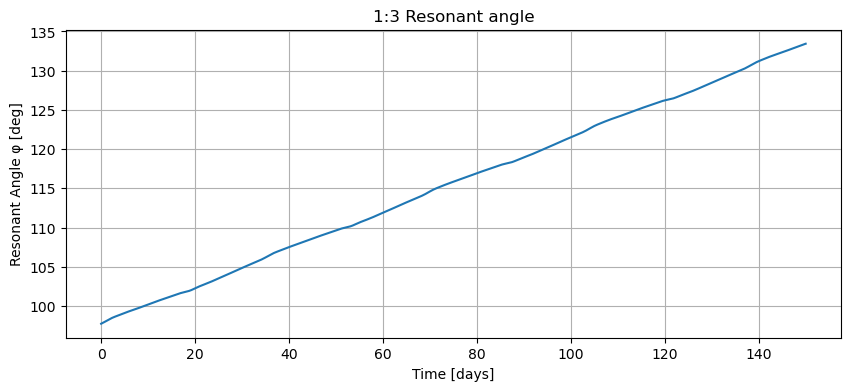

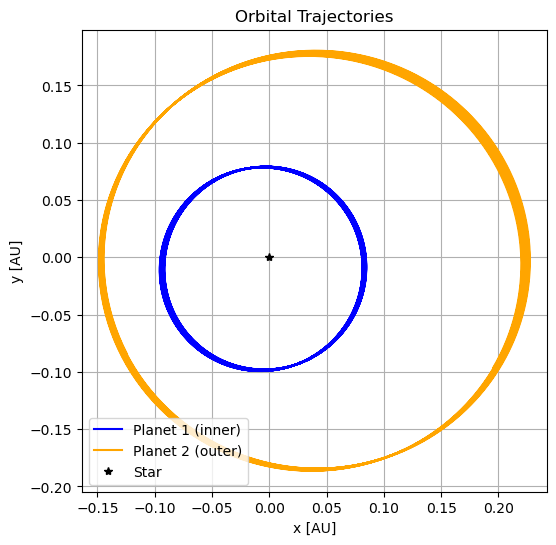

18


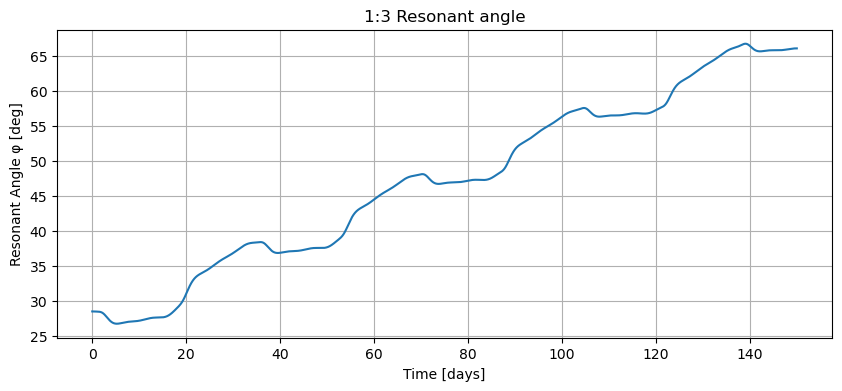

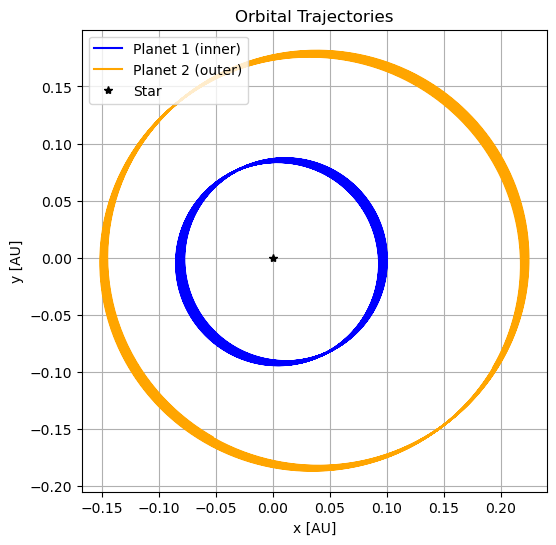

19


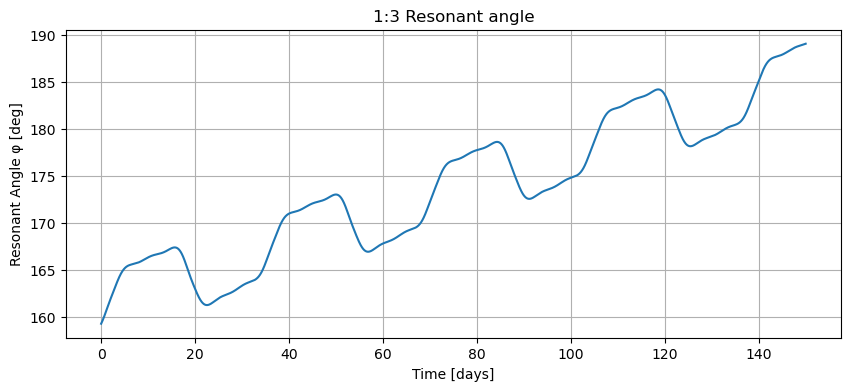

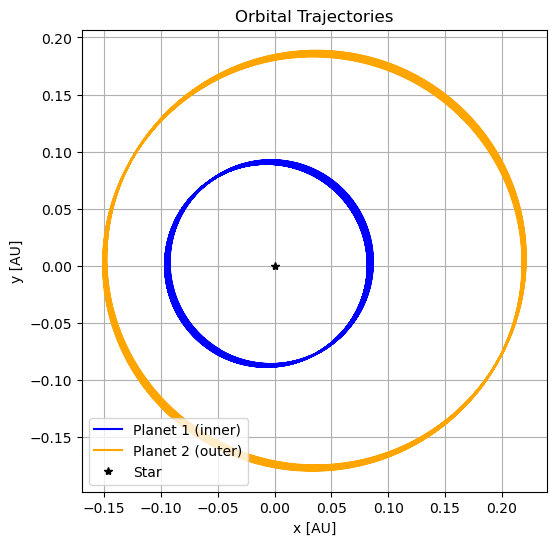

In [74]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import h5py
import numpy as np
filename = 'mcmc_pdfit_TESS+GR_2pl_7th.hd5'

with h5py.File(filename, 'r') as f:
    # 'mcmc/chain' データセットが存在するか確認
    if 'mcmc/chain' in f:
        chain = f['mcmc/chain'][:]  # NumPy配列として読み込み
    elif 'mcmc' in f and 'chain' in f['mcmc']:
        chain = f['mcmc']['chain'][:]
    else:
        raise KeyError("'mcmc/chain' dataset not found in the file.")

        
p0 = chain[-1, 0:20, :]

def resonant(p):
    # シミュレーション初期化
    sim = rebound.Simulation()
    sim.units = ('days', 'AU', 'Msun')
    sim.integrator = "whfast"
    sim.dt = 0.005# 安定性のための時間刻み
    
    # 中心星
    sim.add(m=0.73)
    
    mp1=p[3] #Earth_mass
    e1cosω1=p[4]
    e1sinω1=p[5]
    wpn1=p[6] #radians
    mp2=p[10]
    e2cosω2=p[11]
    e2sinω2=p[12]
    wpn2=p[13]
    e1=e1cosω1**2+e1sinω1**2
    e2=e2cosω2**2+e2sinω2**2

    omega1= np.arctan2(e1sinω1,e1cosω1) % (2*np.pi)
    omega2= np.arctan2(e2sinω2,e2cosω2) % (2*np.pi)
    
    M1 = (wpn1 - omega1) % (2*np.pi)
    M2 = (wpn2 - omega2) % (2*np.pi)

    # 内惑星（1番）
    sim.add(m=mp1/ 332946, a=0.08916997083911733, e=e1, omega=omega1, Omega=np.pi, M=M1)

    # 外惑星（2番）
    sim.add(m=mp2/ 332946, a=0.1845610349257612, e=e2,omega=omega2, Omega=np.pi, M=M2)

    # シミュレーションの記録
    N_outputs = 15000

    times = []
    phi_values = []

    for i in range(N_outputs):
        t = i * 0.01
        sim.integrate(t)

        planet1 = sim.particles[1]
        planet2 = sim.particles[2]

        # 平均黄経 λ = M + ω + Ω
        lambda1 = (planet1.M + planet1.omega + np.pi)  % (2*np.pi)
        lambda2 = (planet2.M + planet2.omega + np.pi)  % (2*np.pi)
        varpi1 = (planet1.omega + np.pi) % (2*np.pi)
        varpi2 = (planet2.omega + np.pi) % (2*np.pi)

        # 共鳴角（1:3共鳴）：φ = 3λ₂ - λ₁ - ϖ₁ 
        phi = (3*lambda2 - lambda1 - varpi1) % (2*np.pi)
        times.append(t)
        phi_values.append(np.degrees(phi))

    # プロット
    plt.figure(figsize=(10, 4))
    plt.plot(times, phi_values)
    plt.xlabel("Time [days]")
    plt.ylabel("Resonant Angle φ [deg]")
    plt.title("1:3 Resonant angle")
    plt.grid()
    plt.show()

import rebound
import numpy as np
import matplotlib.pyplot as plt

def plot_orbits(p, steps=5000, interval=0.1):
    sim = rebound.Simulation()
    sim.units = ('days', 'AU', 'Msun')
    sim.integrator = "whfast"
    sim.dt = 0.005

    sim.add(m=0.73)

    mp1 = p[3]
    e1cosω1 = p[4]
    e1sinω1 = p[5]
    wpn1 = p[6]
    mp2 = p[10]
    e2cosω2 = p[11]
    e2sinω2 = p[12]
    wpn2 = p[13]

    e1 = np.hypot(e1cosω1, e1sinω1)
    e2 = np.hypot(e2cosω2, e2sinω2)

    omega1 = np.arctan2(e1sinω1, e1cosω1) % (2*np.pi)
    omega2 = np.arctan2(e2sinω2, e2cosω2) % (2*np.pi)

    M1 = (wpn1 - omega1) % (2*np.pi)
    M2 = (wpn2 - omega2) % (2*np.pi)

    sim.add(m=mp1 / 332946, a=0.08916997083911733, e=e1, omega=omega1, Omega=np.pi, M=M1)
    sim.add(m=mp2 / 332946, a=0.1845610349257612, e=e2, omega=omega2, Omega=np.pi, M=M2)

    x1, y1 = [], []
    x2, y2 = [], []

    for i in range(steps):
        sim.integrate(i * interval)
        x1.append(sim.particles[1].x)
        y1.append(sim.particles[1].y)
        x2.append(sim.particles[2].x)
        y2.append(sim.particles[2].y)

    # プロット
    plt.figure(figsize=(6, 6))
    plt.plot(x1, y1, label='Planet 1 (inner)', color='blue')
    plt.plot(x2, y2, label='Planet 2 (outer)', color='orange')
    plt.plot(0, 0, 'k*', label='Star')  # 中心星
    plt.xlabel("x [AU]")
    plt.ylabel("y [AU]")
    plt.title("Orbital Trajectories")
    plt.axis('equal')
    plt.grid()
    plt.legend()
    plt.show()


j=0
for i in p0:
    print(j)
    j+=1
    resonant(i)
    plot_orbits(i)


0


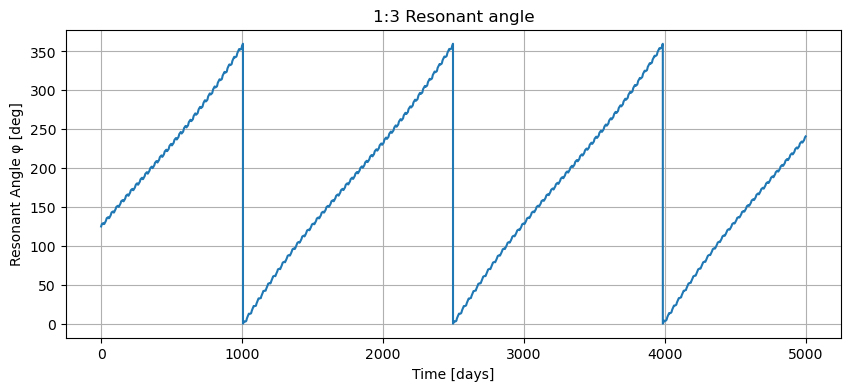

1


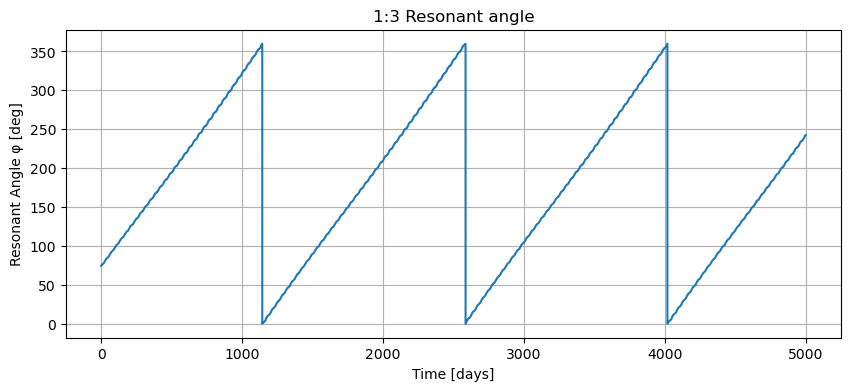

2


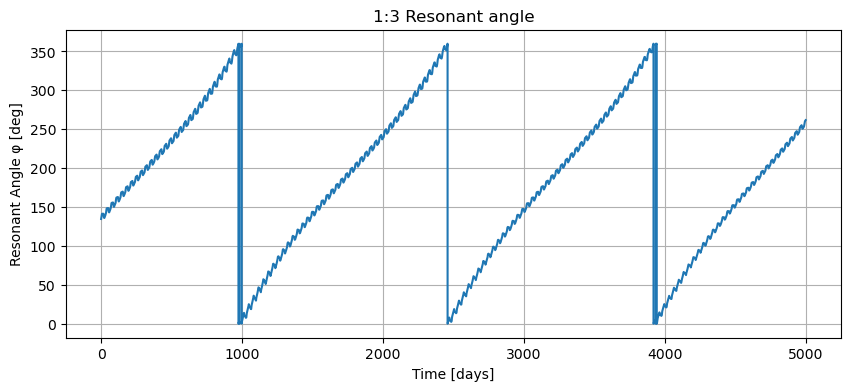

3


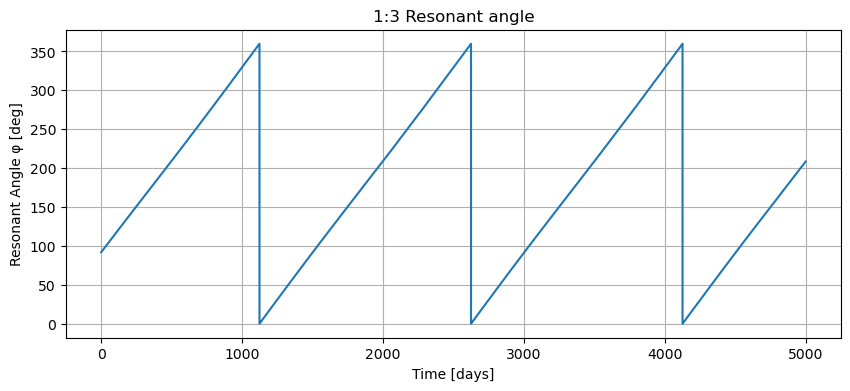

4


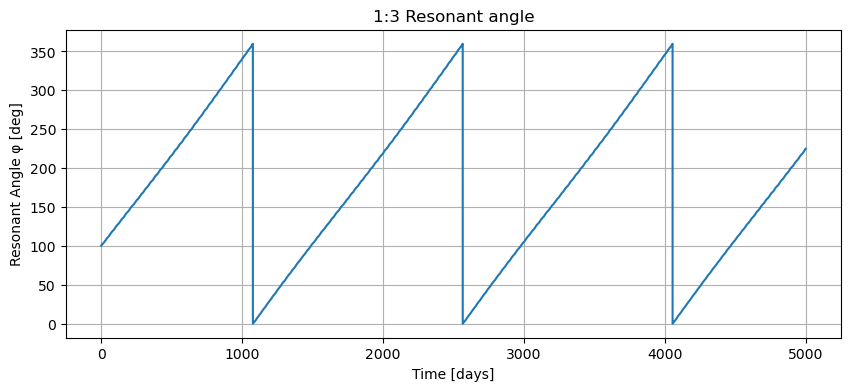

5


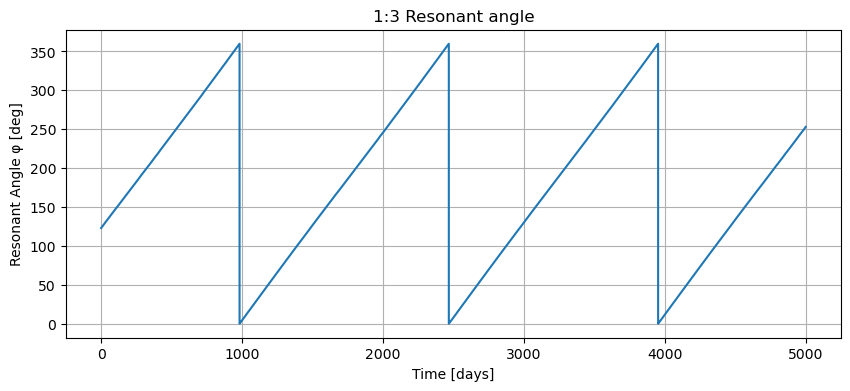

6


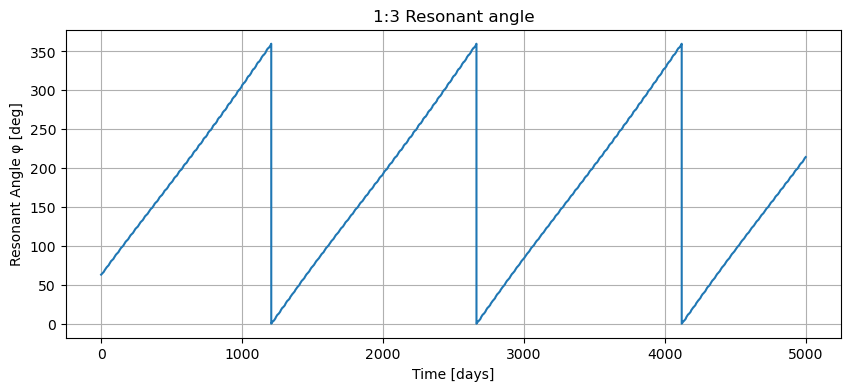

7


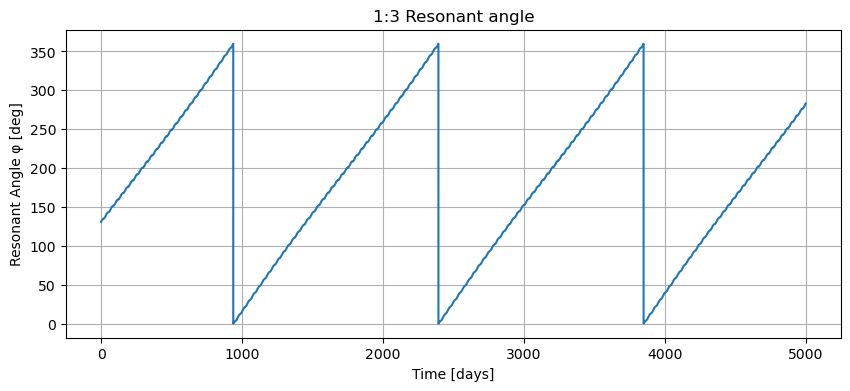

8


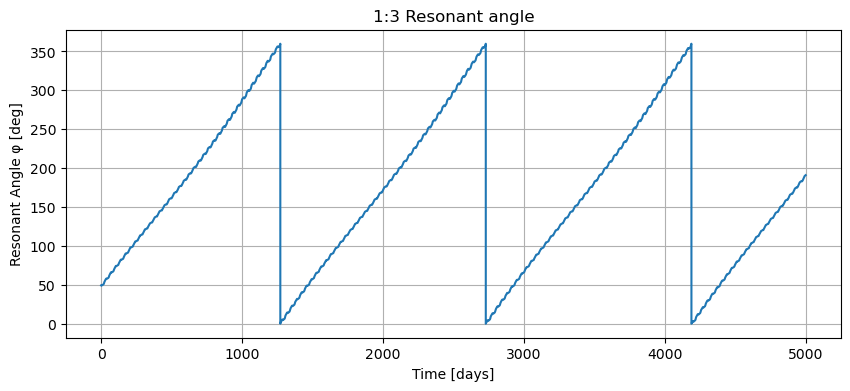

9


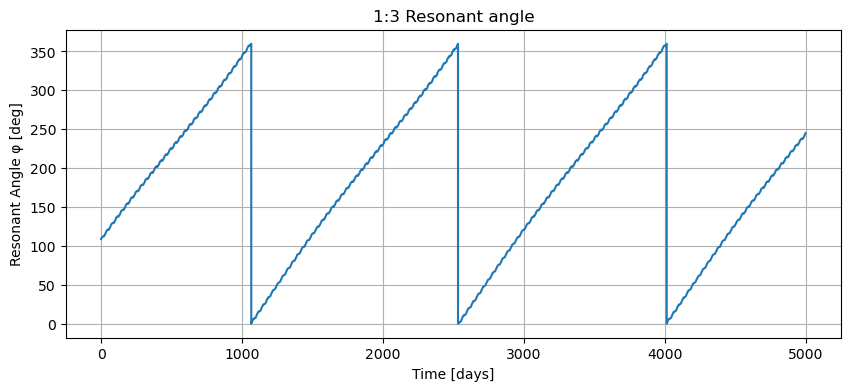

10


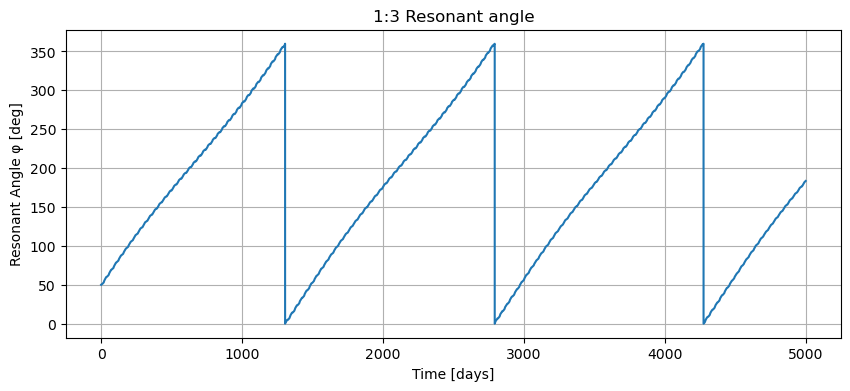

11


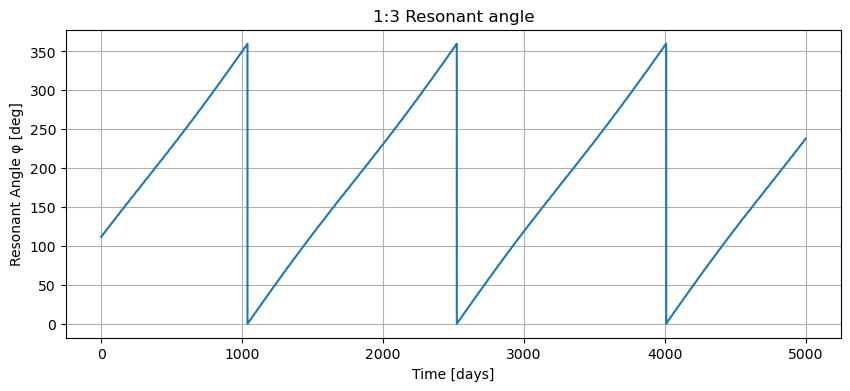

12


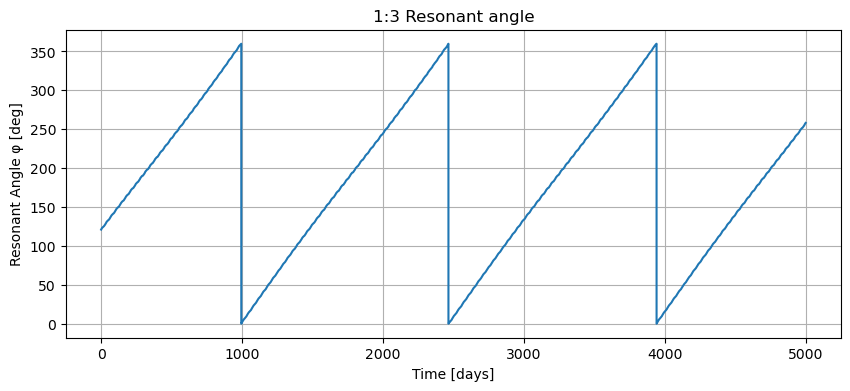

13


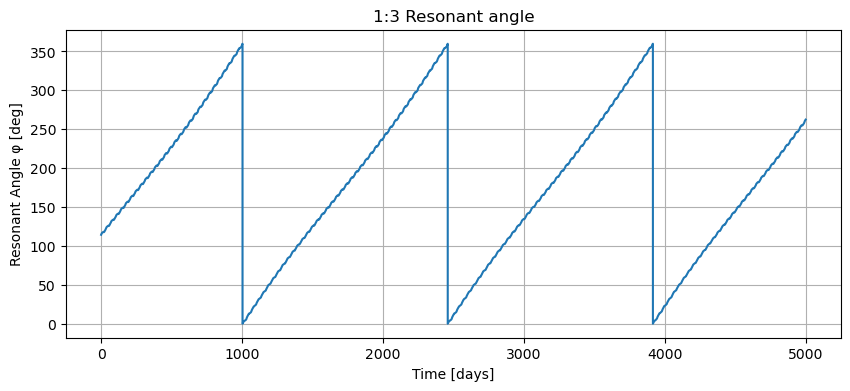

14


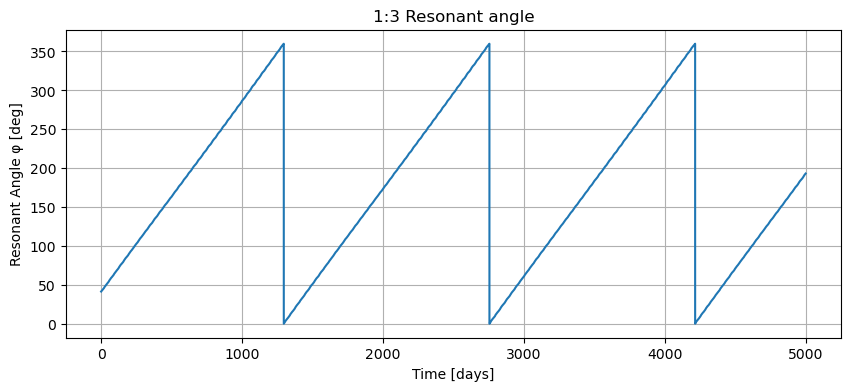

15


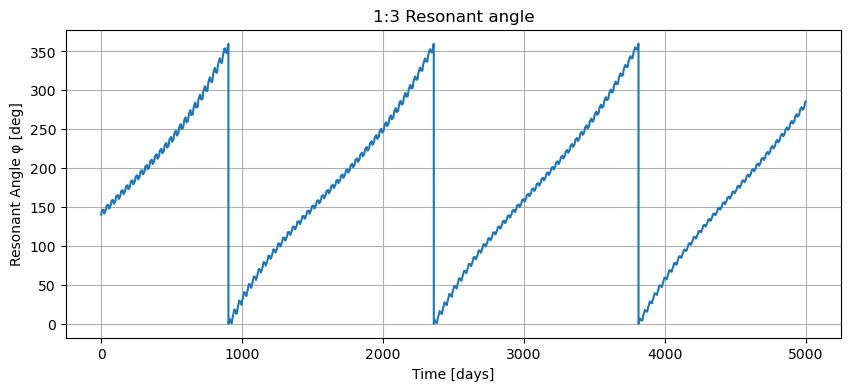

16


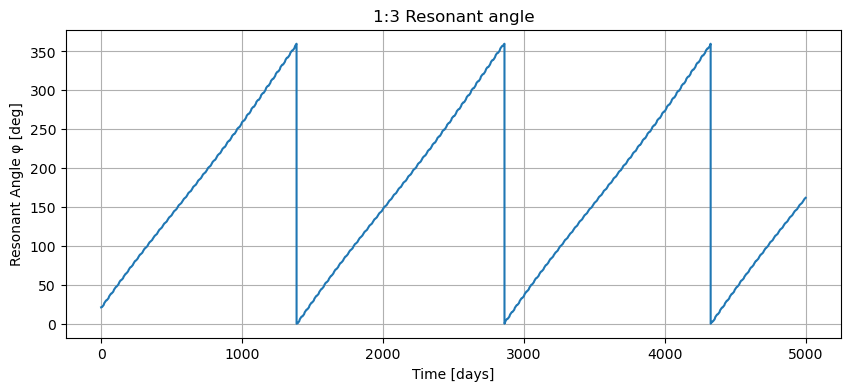

17


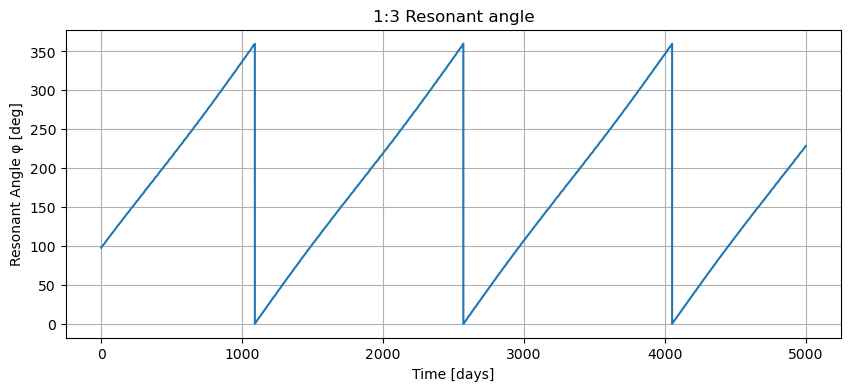

18


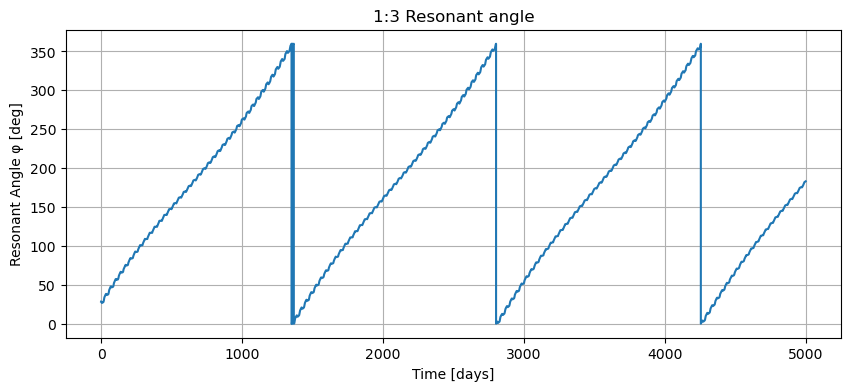

19


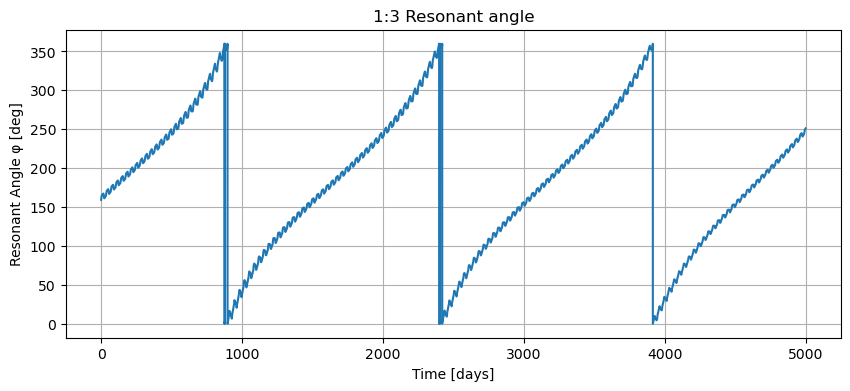

In [73]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import h5py
import numpy as np
filename = 'mcmc_pdfit_TESS+GR_2pl_7th.hd5'

with h5py.File(filename, 'r') as f:
    # 'mcmc/chain' データセットが存在するか確認
    if 'mcmc/chain' in f:
        chain = f['mcmc/chain'][:]  # NumPy配列として読み込み
    elif 'mcmc' in f and 'chain' in f['mcmc']:
        chain = f['mcmc']['chain'][:]
    else:
        raise KeyError("'mcmc/chain' dataset not found in the file.")

        
p0 = chain[-1, 0:20, :]

def resonant(p):
    # シミュレーション初期化
    sim = rebound.Simulation()
    sim.units = ('days', 'AU', 'Msun')
    sim.integrator = "whfast"
    sim.dt = 0.01  # 安定性のための時間刻み
    
    # 中心星
    sim.add(m=0.73)
    
    mp1=p[3] #Earth_mass
    e1cosω1=p[4]
    e1sinω1=p[5]
    wpn1=p[6] #radians
    mp2=p[10]
    e2cosω2=p[11]
    e2sinω2=p[12]
    wpn2=p[13]
    e1=e1cosω1**2+e1sinω1**2
    e2=e2cosω2**2+e2sinω2**2

    omega1= np.arctan2(e1sinω1,e1cosω1) % (2*np.pi)
    omega2= np.arctan2(e2sinω2,e2cosω2) % (2*np.pi)
    
    M1 = (wpn1 - omega1) % (2*np.pi)
    M2 = (wpn2 - omega2) % (2*np.pi)

    # 内惑星（1番）
    sim.add(m=mp1/ 332946, a=0.08916997083911733, e=e1, omega=omega1, Omega=np.pi, M=M1)

    # 外惑星（2番）
    sim.add(m=mp2/ 332946, a=0.1845610349257612, e=e2,omega=omega2, Omega=np.pi, M=M2)

    # シミュレーションの記録
    N_outputs = 50000

    times = []
    phi_values = []

    for i in range(N_outputs):
        t = i * 0.1
        sim.integrate(t)

        planet1 = sim.particles[1]
        planet2 = sim.particles[2]

        # 平均黄経 λ = M + ω + Ω
        lambda1 = (planet1.M + planet1.omega + np.pi)  % (2*np.pi)
        lambda2 = (planet2.M + planet2.omega + np.pi)  % (2*np.pi)
        varpi1 = (planet1.omega + np.pi) % (2*np.pi)
        varpi2 = (planet2.omega + np.pi) % (2*np.pi)

        # 共鳴角（1:3共鳴）：φ = 3λ₂ - λ₁ - ϖ₁ 
        phi = (3*lambda2 - lambda1 - varpi1) % (2*np.pi)
        times.append(t)
        phi_values.append(np.degrees(phi))

    # プロット
    plt.figure(figsize=(10, 4))
    plt.plot(times, phi_values)
    plt.xlabel("Time [days]")
    plt.ylabel("Resonant Angle φ [deg]")
    plt.title("1:3 Resonant angle")
    plt.grid()
    plt.show()
j=0
for i in p0:
    print(j)
    j+=1
    resonant(i)
